<a href="https://colab.research.google.com/github/Yuyang-Yao/Math_-5750_Project3/blob/main/project3_Q2_tensorflow.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Math 5750/6880: Mathematics of Data Science \
Project 3

# 1. Fashion-MNIST image classification using sklearn

In [1]:
import numpy as np
from sklearn import datasets
from sklearn.datasets import load_iris, make_moons, load_breast_cancer, fetch_california_housing
from sklearn.datasets import get_data_home
# from sklearn.linear_model import Perceptron
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, MinMaxScaler
from sklearn.neural_network import MLPClassifier, MLPRegressor
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.linear_model import LinearRegression
from scipy import io #will use this to load matlab data

import matplotlib.pyplot as plt
from matplotlib.colors import ListedColormap
from mpl_toolkits.mplot3d import Axes3D

In [2]:
from sklearn.neural_network import MLPClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

# your code here

# 3. Fashion-MNIST image classification  using pytorch

https://www.tensorflow.org/tutorials/images/cnn?hl=zh-cn

In [3]:
import numpy as np
from tensorflow.keras.datasets import fashion_mnist
import torch
from torch.utils.data import TensorDataset, DataLoader

# Load Fashion-MNIST
# Classes (0-9): T-shirt/top, Trouser, Pullover, Dress, Coat, Sandal, Shirt, Sneaker, Bag, Ankle boot
(X_train, y_train), (X_test, y_test) = fashion_mnist.load_data()

# scale to [0,1], add channel dimension -> (N, 28, 28, 1)
X_train = X_train.astype("float32") / 255.0
X_test  = X_test.astype("float32") / 255.0
X_train = X_train[..., None]
X_test  = X_test[..., None]



y_train = y_train.astype(np.int64)
y_test  = y_test.astype(np.int64)

# train/val split: last 10k of train as validation
X_tr, X_val = X_train[:50000], X_train[50000:]
y_tr, y_val = y_train[:50000], y_train[50000:]

# wrap in PyTorch TensorDatasets and DataLoaders
train_ds = TensorDataset(torch.from_numpy(X_tr),  torch.from_numpy(y_tr))
val_ds   = TensorDataset(torch.from_numpy(X_val), torch.from_numpy(y_val))
test_ds  = TensorDataset(torch.from_numpy(X_test), torch.from_numpy(y_test))

train_loader = DataLoader(train_ds, batch_size=128, shuffle=True)
val_loader   = DataLoader(val_ds,   batch_size=256, shuffle=False)
test_loader  = DataLoader(test_ds,  batch_size=256, shuffle=False)

29515/29515 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step
26421880/26421880 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step
5148/5148 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step
4422102/4422102 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step


In [4]:
import tensorflow as tf
import torch.nn as nn
import torch.optim as optim

# In colab, you should ``change runtime type'' to GPU.
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
print("Using device:", device)

# your code here

Using device: cuda


In [142]:
# loading max-pooing and concolution layer model

from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense

In [7]:
import time

In [150]:
model_CNN1 = tf.keras.models.Sequential([
    tf.keras.Input(shape=(28,28,1)),
    Conv2D(32,(3,3),activation='relu', padding='same'),# the 32 filters are independent; each applies a 3×3 kernel over the 28×28 image, producing 32 feature maps
    # padding='same'),
    MaxPooling2D((2,2)),
    Flatten(),
    Dense(320,activation='relu'),
    Dense(150,activation='tanh'),
    Dense(80,activation='tanh'),#tanh, sigmoid
    Dense(10,activation='softmax')
])

model_CNN1.compile(optimizer='adam',
              loss='SparseCategoricalCrossentropy',
              metrics=['accuracy'])


In [151]:

start_t_CNN1 = time.time()
model_CNN1.fit(X_tr, y_tr, epochs=5)
end_t_CNN1 =time.time()
CNN_train_t1=end_t_CNN1-start_t_CNN1



Epoch 1/5
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 8s 4ms/step - accuracy: 0.8137 - loss: 0.5297
Epoch 2/5
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - accuracy: 0.9068 - loss: 0.2547
Epoch 3/5
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 6s 4ms/step - accuracy: 0.9288 - loss: 0.1916
Epoch 4/5
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - accuracy: 0.9417 - loss: 0.1564
Epoch 5/5
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 6s 4ms/step - accuracy: 0.9542 - loss: 0.1267


In [152]:
print('training time for adam:', CNN_train_t1)
# Evaluate the model on the validate data:
model_CNN1.evaluate(X_val,  y_val, verbose=2)

training time for adam: 30.193870306015015
313/313 - 1s - 5ms/step - accuracy: 0.9135 - loss: 0.2699


[0.26991912722587585, 0.9135000109672546]

313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step


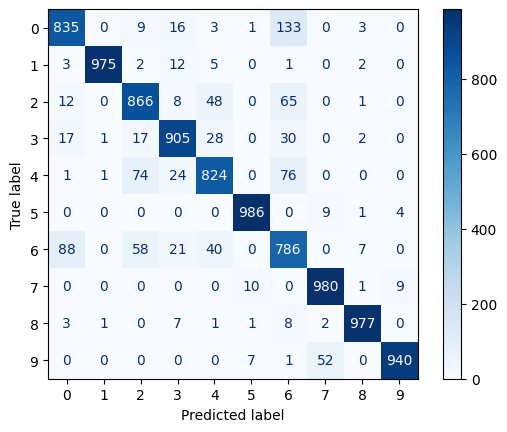

In [153]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
import numpy as np

# Predict class labels
y_pred_CNN1_test1 = np.argmax(model_CNN1.predict(X_test), axis=1)

# Compute confusion matrix
cm = confusion_matrix(y_test, y_pred_CNN1_test1 )

# Display
ConfusionMatrixDisplay(confusion_matrix=cm).plot(cmap='Blues')


In [148]:
from sklearn.metrics import classification_report
print(classification_report(y_test, y_pred_CNN1_test1))

              precision    recall  f1-score   support

           0       0.85      0.86      0.85      1000
           1       0.99      0.98      0.99      1000
           2       0.86      0.80      0.83      1000
           3       0.93      0.90      0.91      1000
           4       0.84      0.85      0.85      1000
           5       0.98      0.98      0.98      1000
           6       0.71      0.77      0.74      1000
           7       0.96      0.97      0.96      1000
           8       0.98      0.97      0.98      1000
           9       0.97      0.96      0.97      1000

    accuracy                           0.91     10000
   macro avg       0.91      0.91      0.91     10000
weighted avg       0.91      0.91      0.91     10000



sigmoid activation for convolution layer and then use relu for linear fully connected layers later is not good, around 0.86 accuracy for test set